In [ ]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import operator
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score
from sklearn.neural_network import MLPClassifier

pd.set_option('display.max_columns', None)

df = pd.read_csv("../dataset/train_processed.csv")
df = df.drop(["Payment_Behaviour"], axis=1)

good = df[df["Credit_Score"] == "Good"]
standard = df[df["Credit_Score"] == "Standard"]
poor = df[df["Credit_Score"] == "Poor"]
standard = standard.sample(frac=0.6, random_state=20)
# poor = poor.sample(frac=0.8, random_state=20)

df = pd.concat([good, good, standard, poor])

good = df[df["Credit_Score"] == "Good"]
standard = df[df["Credit_Score"] == "Standard"]
poor = df[df["Credit_Score"] == "Poor"]

X = df.drop("Credit_Score", axis=1)
y = df["Credit_Score"]

print(f"Number of occurrences:\nGood: {good.shape[0]}\nStandard: {standard.shape[0]}\nPoor: {poor.shape[0]}")
scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(X)
X = pd.DataFrame(data=X_rescaled, columns=X.columns)
categories=[["Good", "Standard", "Poor"]]
encoder = OneHotEncoder(categories=categories, sparse=False)
y = encoder.fit_transform(y.values.reshape(-1, 1))

data_train, data_test, class_train, class_test = train_test_split(X, y, test_size=0.2)
mlp = MLPClassifier(solver="sgd", activation="relu", alpha=0.00035, learning_rate="constant", learning_rate_init=0.1, batch_size=512, hidden_layer_sizes=(50, 43, 32, 24, 17, 13, 10, 7, 4), max_iter=10000, random_state=21)
mlp.fit(data_train, class_train)
pred = mlp.predict(data_test)
print("Accuracy : ", accuracy_score(class_test, pred))
print("Mean Square Error : ", mean_squared_error(class_test, pred))

print("Confusion Matrix for each label : ")
print(multilabel_confusion_matrix(class_test, pred))

print("Classification Report : ")
print(classification_report(class_test, pred))

Number of occurrences:
Good: 13818
Standard: 13982
Poor: 13093


/Users/nhannguyen/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


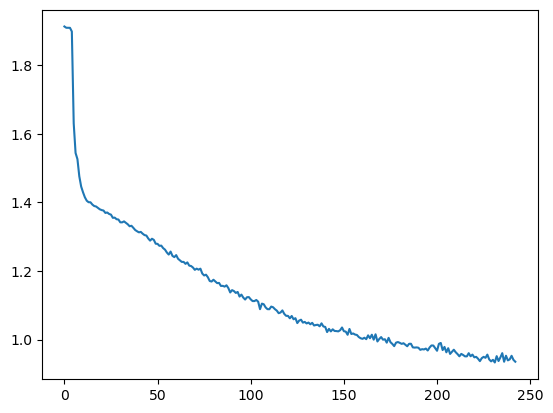

In [62]:
loss_values = mlp.loss_curve_
plt.plot(loss_values)

In [59]:
df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Personal Loan,Payday Loan,Student Loan,Morgage Loan,Home Equity Loan,Consolidation Loan,High_spent_Large_value_payments,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments
0,23,19114.12,1824.843333,3,4,3.0,4,7,4.0,809.98,26.822620,265,49.574949,312.494089,Good,1,1,1,0,0,0,1,0,0,0,1,0,0,0
1,23,19114.12,1824.843333,3,4,3.0,4,8,4.0,809.98,22.537593,271,49.574949,244.565317,Good,1,1,1,0,0,0,1,0,0,0,0,0,0,1
3,28,34847.84,3037.986667,2,4,6.0,1,1,2.0,605.03,38.550848,320,18.816215,484.591214,Good,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,28,34847.84,3037.986667,2,4,6.0,1,1,2.0,605.03,34.977895,323,18.816215,444.867032,Good,0,1,0,0,0,0,0,0,0,0,0,0,0,1
5,28,34847.84,3037.986667,2,4,6.0,1,0,2.0,605.03,33.381010,324,18.816215,481.505262,Good,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43286,29,72279.40,6295.283333,7,6,23.0,7,10,6.0,1273.09,35.680934,171,282.544551,424.790311,Poor,1,0,1,1,0,0,0,0,0,0,1,0,0,0
43288,39,32471.74,2837.978333,7,10,19.0,9,21,8.0,1539.53,28.822380,198,141.922723,334.998311,Poor,0,1,0,1,1,0,1,1,1,0,0,0,0,0
43289,40,32471.74,2837.978333,7,10,19.0,9,22,11.0,1539.53,30.435366,204,141.922723,209.481219,Poor,0,1,0,1,1,0,1,1,0,0,1,0,0,0
43299,31,28796.82,2378.735000,6,6,21.0,5,21,8.0,2382.35,35.168085,71,82.235220,208.983007,Poor,0,0,1,1,1,0,0,0,0,0,0,0,1,0
